# Note for representation theorists

This note is for those who study the representation theory of finite-dimensional (artin) algebras.
I will explain how kappa maps appears in the representation theory. First of all, load [kappa.py](kappa.py):

In [1]:
load("kappa.py")

## References

- [DIRRT] L. Demonet, O. Iyama, N. Reading, I. Reiten, H. Thomas,
  Lattice theory of torsion classes, arXiv:1711.01785.
- [BCZ] E. Barnard, G. Todorov, S. Zhu,
  Dynamical Combinatorics and Torsion Classes,
  J. Pure Appl. Algebra 225 (2021), no. 9, 106642.
- [RST] N. Reading, D. E. Speyer, H. Thomas,
  The fundamental theorem of finite semidistributive lattices,
  arXiv:1907.08050.

## Lattice of torsion classes in Sage

Recently, many people (including me) have been considering the lattice of torsion classes.

Let $\Lambda$ be a finite-dimensional algebra. Then consider $L:=\mathsf{tors}\,\Lambda$, the complete lattice of torsion lattices. Assume further that $\Lambda$ is **$\tau$-tilting finite**, which means that $\mathsf{tors}\,\Lambda$ is a **finite** lattice.

This lattice $L$ is a **semidistributive** lattice, that is, if $\mathcal{T} \cap \mathcal{U}_1 = \mathcal{T} \cap \mathcal{U}_2$, then $\mathcal{T} \cap (\mathcal{U}_1 \vee \mathcal{U}_2) = \mathcal{T} \cap \mathcal{U}_1\, ( = \mathcal{T} \cap \mathcal{U}_2)$ holds, and the dual condition is satisfied. The key fact to prove this is the equality $\mathcal{U}_1 \vee \mathcal{U}_2 = \mathsf{Filt}\,(\mathcal{U}_1 \cup \mathcal{U}_2)$, and the dual condition is automatic by the standard duality (see [DIRRT Theorem 3.1] for the precise proof). ~~Thus we do not have to remember the definition of semidistributivity like me.~~

Let's look at some examples in sage. The easiest non-trivial lattice which is isomorphic to the lattice of torsion class is:

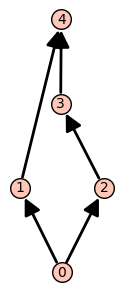

In [2]:
L_A2 = posets.PentagonPoset()
L_A2.plot(figsize=4)

This lattice ``L`` is nothing but $\mathsf{tors}\, \Lambda$ for $\Lambda = kQ$ for $Q = [1 \to 2]$. *Note that the Hasse quiver in Sage is opposite of the representation-theorist's Hasse quiver convention*, thus the node ``0`` is the smallest element. **In this document, we follow representation-theoretist's convention**.

The following ``L_pp`` is $\mathsf{tors}\, \Pi$ where $\Pi$ is a preprojective algebra of type $A_3$, since $\mathsf{tors}\,\Pi$ is isomorphic to the lattice of weak order on the Weyl group $W$ of type $A_3$. In this way, we can construct the lattice of torsion classes for any preprojective algebra of Dynkin type.

In [3]:
W = WeylGroup("A3", prefix = "s")
L_pp = W.weak_lattice()

Moreover, we can construct the lattice of torsion classes for any Dynkin path algebra, since it is isomorphic to the Cambrian lattice.
For example, the following ``L_A3`` is $\mathsf{tors}\,\Lambda$ for $\Lambda = k[1 \leftarrow 2 \to 3]$, where ``(1,3,2)`` represents the Coxeter element $s_1 s_3 s_2$ corresponding to the orientation $1 \leftarrow 2 \to 3$. 

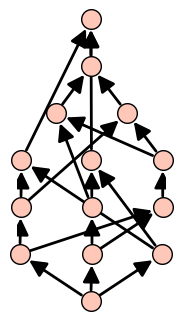

In [4]:
L_A3 = W.cambrian_lattice((1,3,2))
L_A3.plot(label_elements=False, figsize = 5)

Or we can construct this lattice by using $c_Q$-sortable elements as follows.

In [5]:
c_Q = W.from_reduced_word([1,3,2])
LL_A3 = L_pp.subposet([w for w in W if w.is_coxeter_sortable(c_Q)])

In [6]:
LL_A3.is_isomorphic(L_A3)

True

## Brick labeling

In [DIRRT], the labeling of arrows in the Hasse quiver of $L$ was introduced, which assign a brick to each arrow defined as follows (recall that a brick is a module with a division endomorphism ring).

Suppose that there is an arrow $\mathcal{T} \to \mathcal{U}$, namely, $\mathcal{T}\supsetneq \mathcal{U}$ is a minimal inclusion of torsion classes.
Then [DIRRT Theorem 3.3] shows that **there uniquely exists a brick $B$ contained in the category $\mathcal{T} \cap \mathcal{U}^\perp$**, where $\mathcal{U}^\perp$ is the Hom-perpendicular category of $\mathcal{U}$, that is, the torsion-free class corresponding to $\mathcal{U}$. Thus we can put a brick $B$ on the arrow $\mathcal{T} \to \mathcal{U}$, which is called a *brick labeling*.

However, we cannot naively compute brick labels in Sage because we should consider bricks, which we cannot handle with in Sage in general. Instead, we use **join-irreducible elements**.

## Join-irreducible torsion classes and bricks

Consider when a torsion class $\mathcal{T}$ cannot be written as a join of other torsion classes properly contained in $\mathcal{T}$. Such an element of $\mathcal{T} \in L$ is called **join-irreducible**. We can easily check that this is the case precisely when there is a unique arrow $\mathcal{T} \to \mathcal{T}_*$ starting at $\mathcal{T}$.
This is a purely lattice-theoretic notion, but surprisingly, there is a representation-theoretic description of join-irreducibles as follows [DIRRT Theorem 1.4]:

We have a bijection between
- the set of join-irreducible elements in $L$, and
- the set of bricks in $\mathsf{mod}\,\Lambda$.

The maps are given as follows.
- For a brick $B$, consider $\mathsf{T}(B)$, the smallest torsion class containing $B$.
- For a join-irreducible torsion class $\mathcal{T}$, the corresponding brick $B$ is a brick label of the unique arrow $\mathcal{T} \to \mathcal{T}_*$ starting at $\mathcal{T}$.

Of course, we can compute join-irreducibles in Sage since it's purely combinatorial:

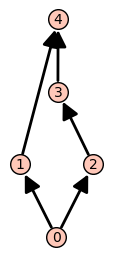

In [7]:
L_A2.plot(figsize=4)

In [8]:
L_A2.join_irreducibles()

[1, 2, 3]

The following shows that there are $11$ bricks in $\mathsf{mod}\, \Pi$ for a preprojective algebra of type $A_3$.

In [9]:
len(L_pp.join_irreducibles())

11

## Bijections between join-irreducibles and meed-irreducibles

Of course, one may dualize the above bijection by the standard duality: there is a bijection between the set of bricks and the set of join-irreducible elements in the lattice of torsion-free classes. Since the lattice of torsion-free classes is the opposite of $L$, the second set can be regarded as the set of **meet-irreducible** element in $L$. By combining, we obtain the following bijections.

$$
\{\text{join-irreducibles in $L$}\} \rightleftarrows \{\text{bricks}\} \rightleftarrows \{\text{meet-irreducibles in $L$}\}
$$

Let $\kappa$ be the composition, which is a bijection from join-irreducibles to meet-irreducibles.
It is natural to ask whether one can compute $\kappa$ in a purely lattice-theoretical way, and this turns out to be **true**.

Before describing it, let's describe $\kappa$ from the representation-theoretic perspective. Let $B$ be a brick. Then the corresponding join-irreducible element is $\mathsf{T}(B)$, and the corresponding meet-irreducible element is the torsion class corresponding to a torsion-free class $\mathsf{F}(B)$ (the smallest torsion-free class containing $B$), which is equal to $^\perp B$. Thus $\kappa$ satisfies

$$
\kappa(\mathsf{T}(B)) = {}^\perp B.
$$

## Definition of the kappa map

Let $L$ be a general finite semiditributive lattice, and let $j$ be a join-irreducible element of $L$. Then there is a unique Hasse arrow $j \to j_*$ starting at $j$. Define $\kappa(j)$ as follows:

$$
\kappa(j) = \max \{ m \in L \, | \, j \wedge x = j_* \}
$$

(The above condition is equivalent to that $j_* \leq x$ and $j \not \leq x$.) Then actually this is well-defined, is meet-irreducible, and gives a bijection from join-irreducibles to meet-irreducibles, see e.g. [RST Theorem 2.28].

For example, for a pentagon poset ``L_A2``, we can compute $\kappa$ as follows.

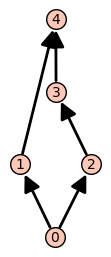

In [10]:
L_A2.plot(figsize = 4)

In [11]:
for j in L_A2.join_irreducibles():
    print(f"The kappa of {j} is {L_A2.kappa(j)}")

The kappa of 1 is 3
The kappa of 2 is 1
The kappa of 3 is 2


## When to use kappa?

So, why we need this kappa map in the representation theory of algebra?

Let $B$ be a brick, and consider the following problem.

- For a given torsion class $\mathcal{T}$, when $B$ is contained in $\mathcal{T}$?

In Sage, *we can join-irreducibles instead of bricks* since they are in bijection. The join-irreducible corresponding to $B$ is $\mathsf{T}(B)$, hence the answer is clear:

- $B \in \mathcal{T}$ if and only if $\mathsf{T}(B) \subseteq \mathcal{T}$.

For example, the number of bricks contained in $\mathcal{T}$ is equal to the number of join-irreducibles $x$ satisfying $x \leq \mathcal{T}$. The following code prints the number of bricks contained in each torsion class over the path algebra of type $A_2$.

In [12]:
for T in L_A2:
    bricks_in_T = [j for j in L_A2.join_irreducibles() if L_A2.is_lequal(j,T)]
    print(f"The number of bricks in {T} is {len(bricks_in_T)}")

The number of bricks in 0 is 0
The number of bricks in 1 is 1
The number of bricks in 2 is 1
The number of bricks in 3 is 2
The number of bricks in 4 is 3


Next, consider **torsion-free side**, namely, the following problem.

- For a given torsion class $\mathcal{T}$, when $B$ is contained in a torsion-free class $\mathcal{T}^\perp$?

Since we have decided that we use join-irreducibles to represent bricks, we can only use $\mathsf{T}(B)$. Thus this problem is not so easy, and **we can use kappa map to solve it!**

Consider when $B \in \mathcal{T}^\perp$ holds. This is equivalent to $\mathsf{F}(B) \subseteq \mathcal{T}^\perp$, where $\mathsf{F}(B)$ is the smallest torsion-free class containing $B$. By taking $^\perp(-)$, we obtain $^\perp B = ^\perp \mathsf{F}(B) \supseteq \mathcal{T}$. Therefore, we want to represent $^\perp B$ using $\mathsf{T}(B)$, **and this is achieved by the kappa map by the above formula: $\kappa(\mathsf{T}(B)) = {}^\perp B$!**

To sum up, the answer is:

- $B \in \mathcal{T}^\perp$ if and only if $\kappa(\mathsf{T}(B)) \supseteq \mathcal{T}$.

And this condition is purely lattice-theoretical, hence Sage can compute it!

For example, the following code computes the numbers of torsion classes and torsion-free classes containing each brick.

In [13]:
for j in L_A2.join_irreducibles():
    tors = [T for T in L_A2 if L_A2.is_lequal(j,T)]
    m = L_A2.kappa(j)
    torf = [T for T in L_A2 if L_A2.is_gequal(m,T)]
    print(f"There are {len(tors)} torsion classes and {len(torf)} torsion-free classes containing brick represented by {j}")

There are 2 torsion classes and 3 torsion-free classes containing brick represented by 1
There are 3 torsion classes and 2 torsion-free classes containing brick represented by 2
There are 2 torsion classes and 2 torsion-free classes containing brick represented by 3


As another example, one can compute the number of bricks containing in $\mathcal{T}_1 \cap \mathcal{T}_2^\perp$ for given torsion classes $\mathcal{T}_1$ and $\mathcal{T}_2$. The subcategory of this form appears in various literatures including [my paper](https://arxiv.org/abs/2010.05433), which was the motivation for dealing with the kappa map.